# 4 Pillars of OOP

> The following is an explainer of the 4 pillars of OOP using vechicles as an example.

### **1. Abstraction (The Blueprint)**

Abstraction is about hiding unnecessary details and showing only the essential features. An Abstract Base Class (ABC) acts as a strict template.

Analogy: You can't buy a "generic vehicle." You can only buy a specific type of vehicle (like a car or plane). However, every vehicle must have a way to move.

In [1]:
from abc import ABC, abstractmethod

class Vehicle(ABC):
    @abstractmethod # <-- This is a wrapper. 
                    # It allows you to take an existing function or method 
                    # and add extra functionality to it without permanently changing its core code.
                    # read here for more https://www.w3schools.com/python/python_decorators.asp
    def move(self):
        # This is a 'contract'—any child class MUST implement this method.
        pass

### **2. Inheritance (The Family Tree)**

Inheritance allows a class to derive its attributes and behaviors from another class. It helps us avoid repeating code.

Analogy: A Car "is a" Vehicle. Since it inherits from Vehicle, it automatically becomes part of that family and agrees to follow the Vehicle blueprint.

In [2]:
class Car(Vehicle):
    # This class inherits from Vehicle
    def __init__(self, color, model):
        self.color = color         # Public attribute
        self.model = model         # Public attribute
        self.__oil_pressure = 30   # Private attribute (Encapsulation)

    def move(self):
        print(f"The {self.color} {self.model} rolls on four wheels.")

### **3. Encapsulation (The "Black Box")**

Encapsulation is the practice of keeping data safe inside an object and hiding the internal complexity from the user.

Analogy: As a driver, you don't manually adjust the oil pressure while driving. The engine handles that internally. In code, we use __ (double underscores) to make a variable "private."

Public: car.move() (Anyone can call this).

Private: car.__oil_pressure (Only the Car class can touch this).

###  *An Aside* **Instantiation (The Creation)**
Instantiation is the act of bringing the blueprint to life. The __init__ method (the Constructor) runs the moment the object is born to set its initial state.

Analogy: Building a specific Red Corvette from the general Car blueprint.

In [3]:
# Instantiation happens when we call the class like a function:
corvette = Car("Red", "Corvette") 
mustang = Car("Blue", "Mustang")

# Each object now has its own unique 'Identity' (State)

### **4. Polymorphism (Many Forms)**

Polymorphism allows us to treat different objects as if they were the same type. It lets one "command" result in different actions depending on the object.

Analogy: If I tell a garage full of vehicles to "Move!", the car rolls and the plane flies. I don't need to give different commands for each; they each know their own version of "move."

In [4]:
class Plane(Vehicle):
    def __init__(self, model):
        self.model = model

    def move(self):
        print(f"The {self.model} flies through the air.")

b2_bomber = Plane('b2 bomber')

# We treat both as 'Vehicles'
garage = [corvette, b2_bomber]

for v in garage:
    v.move() # Polymorphism: One command, different behaviors

The Red Corvette rolls on four wheels.
The b2 bomber flies through the air.


### **Why does this matter for Data Science?**

When we start using Pandas, you will be using these pillars every day:

- Abstraction: You don't care how a CSV is parsed; you just call pd.read_csv().

- Inheritance: A DataFrame inherits many useful tools from a parent NDFrame.

- Encapsulation: The complex math of a .mean() calculation is hidden inside the method.

- Instantiation: When you run df = pd.DataFrame(data), you are instantiating a new, unique object.

- Polymorphism: You can call .plot() on a Series of numbers or a Series of dates, and it knows how to handle both differently!

# Pandas examples

In [5]:
import pandas as pd

In [6]:
housing_df = pd.read_csv('../datasets/housing_price_dataset.csv')

In [7]:
housing_df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [8]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [9]:
housing_df['Price'].mean()

np.float64(224827.32515099045)

array([[<Axes: title={'center': 'SquareFeet'}>,
        <Axes: title={'center': 'Bedrooms'}>],
       [<Axes: title={'center': 'Bathrooms'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

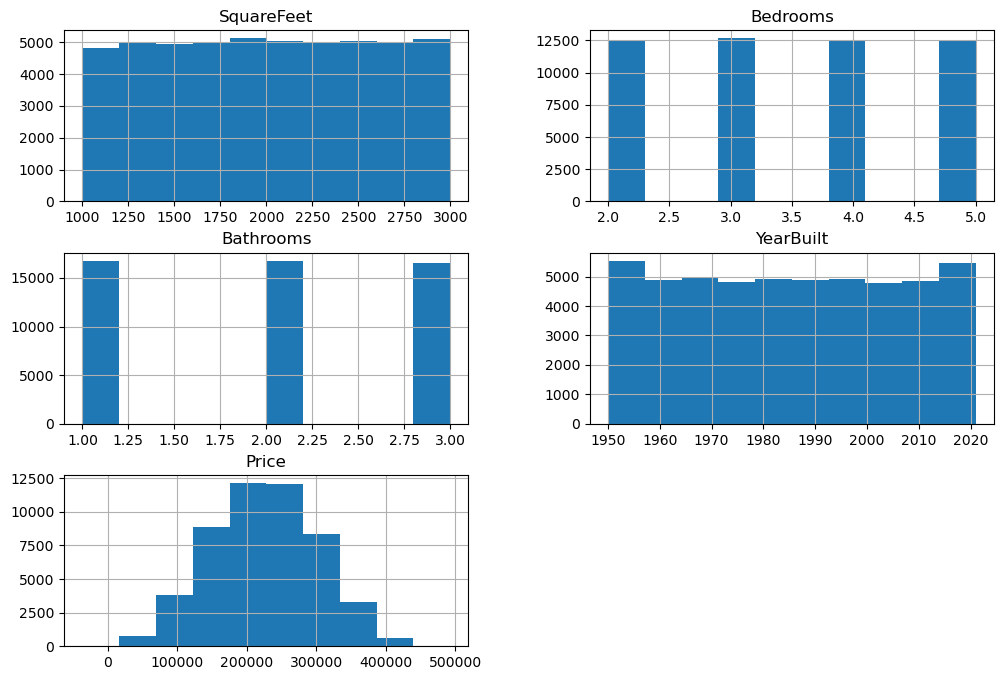

In [10]:
housing_df.hist(figsize=(12,8))

*Note*: This is likely synthetic data, as we'd probably see **square feet** and **price** as left skewed in reality